### ***K*-Means with Pyhton and Numpy**
This is a for-fun project in the Data Science and Informatics class. The aim is to code a *K*-Means Clustering algorithm to cluseter *n*-dimensional data to a give (*K*) clusters.

The algorith is as below.

Given:
* *K* clusters
* X training data
* iter - the number of times the algorithm will be run
* init - The initialization method can be either random or k-means++
1. Randomly initialise *K* centroids
2. Repeat for a given number of iterations:

    i. Assign all samples into the centroids

    ii. For all the clusters, calculate the centroid 
    
    iii. Assign the calculated centroid as the new centroid

Convergence in step 2 above means that untill we have reached max_iterations or untill there is no change (<1% change) in new vs old centroids


In [1]:
import numpy as np

Define the functions

In [2]:
def initialize_centroids(X: np.ndarray, K: int, init="k-means++"):
    """
    Args:
        X:  (numpy.array) of shape (n, d) where n is the number of data points e.g., rows and d is the number of dimensions e.g., the number of columns
        K:  (int) number of desired clusters 
        init:   (str) mode of initializing centroid. Is "k-means++" or "random", default: "k-means++"
    
    Returns:
        A numpy.array of shape (K, d) where each row is a centroid

    Example:
        sample_data = np.random.rand(50, 5)
        print(sample_data)
        >> array([[0.86972102, 0.81164705, 0.55764748, 0.64402901, 0.35200195],
                [0.63123075, 0.28904061, 0.96250882, 0.21030159, 0.50169307],
            ...
                [0.53688645, 0.64984111, 0.42659372, 0.52634236, 0.28854585],
                [0.57347827, 0.23247038, 0.59057671, 0.59052837, 0.23968995]])
        initial_centroids = initialize_centroids(X=sample_data, K=3, init="k-means++")
        print(initial_centroids)
        >> array([[0.36218138, 0.98060153, 0.86943119, 0.43336311, 0.92586009],
                [0.57347827, 0.23247038, 0.59057671, 0.59052837, 0.23968995],
                [0.29819011, 0.72068191, 0.39593067, 0.41426094, 0.18496079]])
    """
    n, d = X.shape
    centroids = np.zeros((K, d))

    # K-Means++ initialization
    if init == "k-means++":
        index = np.random.choice(n)
        centroids[0] = X[index]
        # X = np.delete(X, 0, axis=0)
        
        # Iterate through K-1 - centroid[i] is already selected at random 
        for i in range(K-1):
            distances = []
            # Iterate through all the data points
            for j in range(n):
                dist = calculate_euclidean_distance(centroids[i], X[j])
                distances.append(dist)
                # Find the index of the data point with the greatest distance from the jth data point
                max_dist_index = distances.index(max(distances))
                distant_sample = X[max_dist_index]
                # If data point with the greatest euc dist is already in centroids, replace with -float("inf") so it is not selected again
                if distant_sample in centroids:
                    distances[max_dist_index] = -float("inf")
                    max_dist_index = distances.index(max(distances))
                    distant_sample = (X[max_dist_index])
                centroids[i + 1] = distant_sample

    # Random initialization
    # Choose K indices from 0 to n-1 without replacement
    elif init == "random":

        indices = np.random.choice(n, K, replace=False)

        # Assign each data point to the indices
        for i in range(K):
            centroids[i] = X[indices[i]]
    return centroids


def calculate_euclidean_distance(x: (int, float), centroid: (int, float)):
    """ 
    Returns:
        The euclidean distance/shortest distance (numpy.float64) between x, and another point, in this case the centroid
    """
    return np.linalg.norm(x - centroid)

def assign_clusters(X: np.ndarray, centroids:np.ndarray):
    """
    X  - numpy array of shape (n, d)
    centroids - numpy array of shape (K, d) where K is the number of clusters
    Returns a numpy array of shape (n, ) where each element from 0 to K-1 represents the cluster index
    
    """
    n, d = X.shape
    K = centroids.shape[0]
    clusters = np.zeros(n)
    # Loop through each data point
    for i in range(n):
        # Initialize the minimum distance and the nearest cluster index
        min_dist = float('inf')
        nearest_cluster = -1
        # Loop through each centroid
        for j in range(K):
            # Calculate the distance between the data point and the centroid
            dist = calculate_euclidean_distance(X[i], centroids[j])
            # Update the minimum distance and the nearest cluster index if needed
            if dist < min_dist:
                min_dist = dist
                nearest_cluster = j
        # Assign the data point to the nearest cluster index
        clusters[i] = nearest_cluster
    return clusters

def update_centroids(X: np.ndarray, clusters: np.ndarray, K: int):
    """
    X  - numpy array of shape (n, d)
    cluster - numpy array of shape (n, ) where each element from 0 to K-1 represents the cluster index
    K - an integer representing the number of desired clusters
    Returns a numpy array of shape (K, d) where each row is a centroid
    """
    n, d = X.shape
    centroids = np.zeros((K, d))
    # Loop over all the clusters
    for i in range(K):
        # Find the data_point that belongs to teh ith cluster
        cluster_points = X[clusters == i]
        # The new centroid is the mean of the data_points belonging to each cluster
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

Putting everything together...

In [3]:
def K_Means(X: np.ndarray, K: int, iter=10, init="k-means++"):
    """
    Args:
        X:      (array) The data to be clusters. Must be of shape (n, d)
        K:      (int) Number of iterations the algorithm is run
        iter:   (int) Number of times to algorithm is run
        init:   (str) Mode of initializing the first centroids. Can be "k-means++" or "random".
                Default: "k-means++"

    Returns:
        Tuple: (centroids, clusters)
            centroids:  (array) of shape (K, d). Each row isa centroid
            clusters:   (array) of shape (n,). Each element from 0 to K-1 represents the cluster
                        index

    Example:
        import numpy as np
        sample_data = np.radom.rand(1000, 6)
        print(sample_data)
        >> [[0.11546992 0.69701284 0.94626245 0.43945078 0.2757349  0.20139318]
            [0.41358741 0.5838059  0.78167989 0.10376082 0.24101117 0.91760498]
            [0.88795947 0.284727   0.53309844 0.00563349 0.75874276 0.35680307]
            ...
            [0.20750743 0.34537109 0.48714451 0.82831332 0.7782756  0.58122822]
            [0.91804444 0.12622502 0.75155295 0.14634239 0.31668819 0.91805061]
            [0.76557576 0.06529301 0.24500135 0.76615681 0.07685889 0.35137789]]
        num_clusters = 5
        num_iter = 10
        initialization = "random"
        centroids, clusters = K_Means(X=sample_data, K=num_clusters, iter=num_iter, init=initialization)
        print(centroids)
        >> [[0.67532719 0.52925574 0.34511936 0.54238492 0.19822194 0.5829324 ]
            [0.60509993 0.34625553 0.48119633 0.49515062 0.73236484 0.80382581]
            [0.18992726 0.47520962 0.66133127 0.36505052 0.39844507 0.48462117]
            [0.71625778 0.54047154 0.79467138 0.53513347 0.56858578 0.34848737]
            [0.35889303 0.51498794 0.26376929 0.58924582 0.6474062  0.28585128]]
    """
    # Randomly nitialize the centroids by calling the initialize_centroids function
    centroids = initialize_centroids(X, K, init)

    # Loop over the number of iterations
    for i in range(iter):
        # For each iteration, assign clusters by calling the assign_clusters function
        clusters = assign_clusters(X, centroids)
        # For each iteration, update the centroids by calling the update_centroids function
        centroids = update_centroids(X, clusters, K)
    return (centroids, clusters)

In [26]:
sample_data = np.random.rand(1452, 2)
centroids, clusters = K_Means(X=sample_data, K=7, iter=20, init="k-means++")

In [27]:
set(clusters)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

Plot the predictions
*Note:* The function below works only for 2-d data. More to come soon...

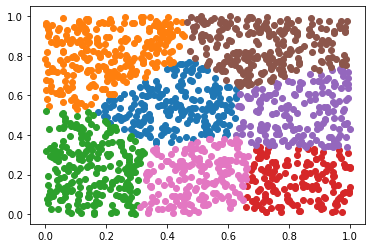

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_clusters(X, clusters):
    X = pd.DataFrame(X)
    X["labels"] = clusters
    for i in range(len(set(clusters))):
        filtered_df = X[X["labels"] == i]
        plot = plt.scatter(filtered_df[filtered_df.columns[0]], filtered_df[filtered_df.columns[1]])
    return plot


plot_clusters(sample_data, clusters=clusters)